
# Introductie Computer Vision

Dit notebook introduceert de basisconcepten van *computer vision* aan de hand van eenvoudige wiskundige objecten
(vectoren, matrices en tensoren) en praktische oefeningen met digitale afbeeldingen.

## Leerdoelen
Na het doorlopen van dit notebook kan je:
- uitleggen wat vectoren, matrices en tensoren zijn in de context van beeldverwerking;
- werken met `numpy`-arrays en slicing toepassen;
- een digitale foto interpreteren als een 3D-tensor;
- eenvoudige computer vision-technieken toepassen zoals grijswaardenconversie,
  thresholding en background subtraction.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Een (heel klein) beetje wiskunde

### Wat is een vector?

$\vec{v} =
\begin{bmatrix}
1 \\
4 \\
7 \\
\dots 
\end{bmatrix}
$

![](figures/vector.png)

### Wat is een matrix?

$\mathbf{A} = \begin{bmatrix}1&2&3&\dots\\4&5&6&\dots\\7&8&9&\dots\\&\dots\end{bmatrix}$

![](figures/matrix.png)

### Wat is een tensor?

$\mathbf{I} = \left[
\begin{bmatrix}33&17&\dots\\11&19&\dots\\\dots&&\end{bmatrix}, 
\begin{bmatrix}7&5&\dots\\24&12&\dots\\\dots&&\end{bmatrix}, 
\begin{bmatrix}2&4&\dots\\0&165&\dots\\\dots&&\end{bmatrix}, 
\dots
\right]
$

![](figures/tensor5.png)

### Numpy tensoren 
`numpy` is een handige package om te werken met tensoren.

Je kan een tensor aanmaken vanuit een (geneste) lijst.  De vector $\vec{v} =
\begin{bmatrix}
1 \\
4 \\
7
\end{bmatrix}
$
maak je bevoorbeeld aan met het commando `v = np.array([1,4,7])`.

Voor de matrix $\mathbf{A} = \begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}$ gebruik je
`A = np.array([[1,2,3],[4,5,6],[7,8,9]])`.

#### Opdracht

Maak een driedimensionele numpy array `T` aan met dimensies (4,2,3).  Kies zelf de elementen.  Print de array.

## *Slicing*

Dikwijls gaan we slechts een deel van een array gebruiken.  Het derde element van de eendimensionele array `v` verkrijg je met `v[2]`.  De index is `2` omdat numpy op 0 begint te tellen.  Voor de twee eerste rijen van `A` gebruik je `A[1:,:]`.  De laatste kolom van `A` kan je bekomen met `A[:,-2]`.


#### Opdracht

- *Slice* `T` zodat je  het element met indices (1,1,1) krijgt.
- *Slice* `T` zodat je de middelste "laag" krijgt.  Hiermee bedoelen we alle elementen waarvan de laatste index 1 is.

## Digitale foto's als 3D tensoren

![](figures/tensor.png)

In de map `data/kiwibes` zitten verschillende foto's van het experiment met de kiwibessen.  Onderstaande code laat de foto in in een array en plot de array.

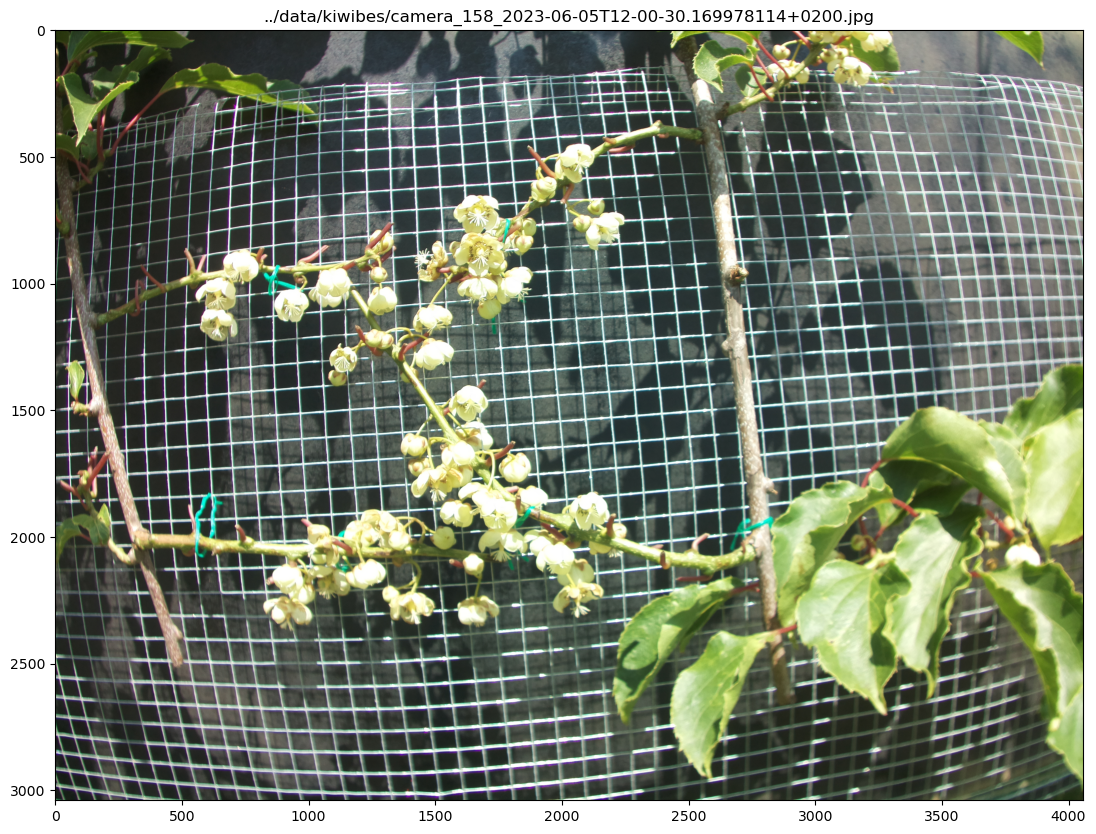

In [2]:
# Foto inladen
file_in = '../data/kiwibes/camera_158_2023-06-05T12-00-30.169978114+0200.jpg'
img = plt.imread(file_in)

# Plotten
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.title(file_in)
plt.show()


#### Opdracht

- Wat is de grootte van deze foto (hoogte en breedte)?  Hoeveel pixels is dat in totaal?

- Zoom in op het vierkante gebied met centrum (1000, 800) en zijde 300.  Tip: gebruik slicing.

- Plot de drie kleurkanalen apart voor dit gebied. Gebruik de op optie `cmap = 'gray'` in `plt.plot(...)` voor een duidelijker resultaat.

## Enkele simpele technieken

### *Background subtraction*

Opeenvolgende foto's trekken sterk op elkaar.  Op een beetje verandering van lichtintensiteit na, is het grootste verschil een bewegend object.  Stel dat we de huidige foto hebben ingeladen in `img` en de vorige in `prv`.  Als we het verschil tussen beide nemen (`diff = img - prv`), krijgen we een tensor waarvan de pixels die niet veranderd zijn (de achtergrond), 0 worden.  De pixels waar er wel verandering is (de bewegende objecten), krijgen hogere (absolute) waarden.

### Omzetten naar grijswaarden

Onze foto's hebben drie kanalen (RGB).  Deze zijn de laatste dimensie van de 3D array `img`.  Sommige technieken zijn gemakkelijker uit te leggen als we in grijswaarden werken, en sommige fenomenen zijn ook gemakkelijker te zien.

Pixelwaarden varieren meestal tussen 0 en 255.  Voor een RGB-foto heeft elke pixel dus drie getallen in dit bereik; bij een foto in grijswaarden hebben we een enkel getal voor elke pixel.  Een grijswaardenbeeld kan dus beschreven worden door een matrix, terwijl we voor een RGB-beeld een 3D-tensor nodig hebben.

Een eenvoudige manier om een RGB-beeld `img` om te zetten naar grijswaarden `gray`, is om voor elke pixel het gemiddelde van de drie kleuren te nemen.  Hoe dit praktisch gebeurt, kan je in de volgende opdracht zelf uitvinden.

### *Thresholding*

#### Ondergrenzen

Het kan voorkomen dat de objecten uitgesproken andere pixelwaarden hebben dan de achtergrond.  Stel dat we al een grijswaardenbeeld `gray` gemaakt hebben.  Witte bloemen hebben hoge pixelwaarden op dat beeld.  *Thresholding* houdt in dat we op basis van een grijswaardenbeeld `gray` een nieuwe matrix `thresh` maken, waarvan de elementen 1 zijn voor overeenkmstige elementen in `gray` die hoger zijn dan een drempelwaarde `lower`.  De andere elementen van `thresh` zijn 0.  We krijgen dus een matrix van enen en nullen.  Hiervoor volstaat het om de operatie `thresh = gray > lower` uit te voeren.

#### Bovengrenzen

Soms willen we juist donkere objecten gaan detecteren.  De werkwijze is analoog, maar we gebruiken nu een bovengrens:  `thresh = gray < upper`.

#### Combinatie

Het kan ook zijn dat onze objecten binnen een bereik `[lower, upper]` liggen.  Je combineert beide grenzen gemakkelijk met `diff_thresh = (diff_gray >= lower) * (diff_gray <= upper)`.


    

### Opdracht

- Bekijk de foto's in de map `data/kiwibes2023`.  Op welke foto's gebeurt er iets interessants?

- Laad twee opeenvolgende foto's in de variabelen `prv` en `img`.

- Zet `img` om naar grijswaarden in de variabele `gray`.

- Detecteer de bloemen door te *thresholden* met een zelfgekozen drempelwaarde `lower`.

- Pas bovenstaande technieken toe om te proberen insecten te detecteren.  Visualiseer elke tussenstap en je eindresultaat.

    - *Background subtraction*
    - Omzetten naar grijswaarden
    - *Thresholding*: kies zelf drempelwaardes `lower` en `upper`

- Lukt dit goed om een insect te detecteren?  Kan dit gemakkelijk geautomatiseerd worden?

### Extra opdrachten

- Maakt het een verschil of we eerst `prv` en `img` omzetten naar grijswaarden en dan het verschil nemen, of omgekeerd?
- Zoek de positie van pixels die de drempelwaarde overschrijden.  Plot een klein gebied daarrond.  In het ideale geval zou je een close-up van een insect moeten krijgen.
- Pas thresholding toe op elke van de kleurenkanalen van een RGB-foto.  Pixels van blaadjes hebben typisch hoge waarden voor het groene kanaal.  Zoek de pixels waarvoor het groene kanaal boven een redelijk hoog getal, bijvoorbeeld 200, ligt.  Pas die waarde 200 aan tot je een goede detectie krijgt: veel pixels van blaadjes, weinig van iets anders.  Combineer eventueel met drempelwaarden voor het rode en het blauwe kanaal.